In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("karanwxlia/underwater-trash-detection")

print("Path to dataset files:", path)

100%|██████████| 213M/213M [00:10<00:00, 20.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/karanwxlia/underwater-trash-detection/versions/1


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/karanwxlia/underwater-trash-detection/versions/1"

# List contents
print("Dataset Structure:", os.listdir(dataset_path))


Dataset Structure: ['utd2.v8i.coco', 'utd2.v8i.tensorflow', 'utd2.v8i.yolov8']


In [ ]:
yolo_path = os.path.join(dataset_path, "utd2.v8i.yolov8")

# List YOLOv8 folder contents
print("YOLOv8 Folder Structure:", os.listdir(yolo_path))


YOLOv8 Folder Structure: ['README.roboflow.txt', 'valid', 'train', 'data.yaml', 'test', 'README.dataset.txt']


In [ ]:
# Define paths
train_path = os.path.join(yolo_path, "train", "images")
val_path = os.path.join(yolo_path, "valid", "images")
test_path = os.path.join(yolo_path, "test", "images")

# Function to count images
def count_images(folder):
    return len([f for f in os.listdir(folder) if f.endswith(('.jpg', '.png', '.jpeg'))])

# Count images in each split
train_count = count_images(train_path)
val_count = count_images(val_path)
test_count = count_images(test_path)

# Total images
total_count = train_count + val_count + test_count

# Calculate percentages
train_pct = (train_count / total_count) * 100
val_pct = (val_count / total_count) * 100
test_pct = (test_count / total_count) * 100

# Print results
print(f"Train set: {train_count} images ({train_pct:.2f}%)")
print(f"Validation set: {val_count} images ({val_pct:.2f}%)")
print(f"Test set: {test_count} images ({test_pct:.2f}%)")
print(f"Total images: {total_count}")


Train set: 7308 images (76.32%)
Validation set: 1795 images (18.74%)
Test set: 473 images (4.94%)
Total images: 9576


In [ ]:
import os
import shutil
import random

# Define paths
image_paths = {
    "train": os.path.join(yolo_path, "train", "images"),
    "valid": os.path.join(yolo_path, "valid", "images"),
    "test": os.path.join(yolo_path, "test", "images"),
}
label_paths = {
    "train": os.path.join(yolo_path, "train", "labels"),
    "valid": os.path.join(yolo_path, "valid", "labels"),
    "test": os.path.join(yolo_path, "test", "labels"),
}

# Get all image filenames
all_images = []
for split in image_paths:
    all_images.extend([os.path.join(image_paths[split], f) for f in os.listdir(image_paths[split]) if f.endswith(('.jpg', '.png', '.jpeg'))])

# Shuffle images for randomness
random.shuffle(all_images)

# Target split counts
train_target = int(0.7 * len(all_images))
valid_target = int(0.1 * len(all_images))
test_target = len(all_images) - train_target - valid_target

# Function to move files
def move_files(file_list, target_folder, label_folder):
    for img_file in file_list:
        filename = os.path.basename(img_file)
        label_file = filename.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt')

        # Move image
        shutil.move(img_file, os.path.join(target_folder, filename))

        # Move corresponding label (if exists)
        src_label_path = os.path.join(os.path.dirname(img_file).replace("images", "labels"), label_file)
        if os.path.exists(src_label_path):
            shutil.move(src_label_path, os.path.join(label_folder, label_file))

# Move files into the new split
move_files(all_images[:train_target], image_paths["train"], label_paths["train"])
move_files(all_images[train_target:train_target + valid_target], image_paths["valid"], label_paths["valid"])
move_files(all_images[train_target + valid_target:], image_paths["test"], label_paths["test"])

print("✅ Dataset split adjusted successfully!")


✅ Dataset split adjusted successfully!


In [ ]:
# Count images in each set
train_count = count_images(image_paths["train"])
val_count = count_images(image_paths["valid"])
test_count = count_images(image_paths["test"])

# Total images
total_count = train_count + val_count + test_count

# Calculate percentages
train_pct = (train_count / total_count) * 100
val_pct = (val_count / total_count) * 100
test_pct = (test_count / total_count) * 100

# Print results
print(f"Train set: {train_count} images ({train_pct:.2f}%)")
print(f"Validation set: {val_count} images ({val_pct:.2f}%)")
print(f"Test set: {test_count} images ({test_pct:.2f}%)")
print(f"Total images: {total_count}")


Train set: 6703 images (70.00%)
Validation set: 957 images (9.99%)
Test set: 1916 images (20.01%)
Total images: 9576


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model (small version for now)
model = YOLO("yolov8n.pt")

# Train on dataset
model.train(data=f"{yolo_path}/data.yaml", epochs=50, imgsz=640, batch=16, device="cuda")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 356MB/s]


Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/root/.cache/kagglehub/datasets/karanwxlia/underwater-trash-detection/versions/1/utd2.v8i.yolov8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

100%|██████████| 755k/755k [00:00<00:00, 95.0MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 241MB/s]


AMP: checks passed ✅


train: Scanning /root/.cache/kagglehub/datasets/karanwxlia/underwater-trash-detection/versions/1/utd2.v8i.yolov8/train/labels... 6703 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6703/6703 [00:04<00:00, 1414.07it/s]

train: WARNING ⚠️ /root/.cache/kagglehub/datasets/karanwxlia/underwater-trash-detection/versions/1/utd2.v8i.yolov8/train/images/obj1218_frame0000050_jpg.rf.4cc583ce533567da933951eafb1a3604.jpg: 1 duplicate labels removed


train: New cache created: /root/.cache/kagglehub/datasets/karanwxlia/underwater-trash-detection/versions/1/utd2.v8i.yolov8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /root/.cache/kagglehub/datasets/karanwxlia/underwater-trash-detection/versions/1/utd2.v8i.yolov8/valid/labels... 957 images, 0 backgrounds, 0 corrupt: 100%|██████████| 957/957 [00:01<00:00, 582.85it/s]

val: New cache created: /root/.cache/kagglehub/datasets/karanwxlia/underwater-trash-detection/versions/1/utd2.v8i.yolov8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.12G      1.491      2.572      1.614         43        640: 100%|██████████| 419/419 [02:10<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.09it/s]


                   all        957       1432      0.273      0.237      0.174     0.0754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.61G      1.569      2.124      1.661         40        640: 100%|██████████| 419/419 [02:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.47it/s]

                   all        957       1432      0.281      0.274      0.218     0.0933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.62G      1.574      2.002      1.673         37        640: 100%|██████████| 419/419 [02:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]

                   all        957       1432      0.457      0.371      0.345      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.64G       1.56      1.944      1.665         29        640: 100%|██████████| 419/419 [02:04<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.61it/s]

                   all        957       1432      0.279      0.278      0.185     0.0877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.66G      1.535      1.822      1.637         47        640: 100%|██████████| 419/419 [02:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]

                   all        957       1432      0.573      0.416      0.453      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.67G       1.48      1.708      1.598         38        640: 100%|██████████| 419/419 [02:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.77it/s]

                   all        957       1432       0.62      0.549      0.579      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.69G      1.431      1.631       1.57         70        640: 100%|██████████| 419/419 [02:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.29it/s]

                   all        957       1432      0.604       0.55      0.591      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.71G      1.427      1.582      1.558         44        640: 100%|██████████| 419/419 [02:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.23it/s]

                   all        957       1432      0.691      0.498      0.574      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.72G      1.405      1.545      1.536         55        640: 100%|██████████| 419/419 [02:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.22it/s]

                   all        957       1432      0.672      0.548      0.614      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.74G      1.373      1.473       1.52         38        640: 100%|██████████| 419/419 [02:02<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.29it/s]

                   all        957       1432      0.633      0.567      0.609      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.76G      1.359      1.419      1.507         40        640: 100%|██████████| 419/419 [02:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.32it/s]

                   all        957       1432       0.71       0.63      0.707      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.77G      1.355      1.405      1.508         66        640: 100%|██████████| 419/419 [02:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.20it/s]

                   all        957       1432      0.725      0.635      0.709       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.79G      1.331       1.35      1.486         46        640: 100%|██████████| 419/419 [02:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.64it/s]

                   all        957       1432      0.727      0.663      0.732      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.81G       1.32      1.316      1.479         29        640: 100%|██████████| 419/419 [02:04<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.68it/s]

                   all        957       1432      0.649      0.595      0.654      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.82G      1.307      1.299      1.467         45        640: 100%|██████████| 419/419 [02:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.64it/s]

                   all        957       1432      0.788      0.664      0.769      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.84G      1.281      1.252      1.451         34        640: 100%|██████████| 419/419 [02:04<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.87it/s]

                   all        957       1432      0.774      0.713       0.79      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.86G      1.285      1.249      1.452         35        640: 100%|██████████| 419/419 [02:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.45it/s]

                   all        957       1432      0.748      0.692      0.764      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.88G      1.278      1.206      1.437         25        640: 100%|██████████| 419/419 [02:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.29it/s]

                   all        957       1432      0.781      0.715      0.773      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.89G      1.256      1.183      1.429         37        640: 100%|██████████| 419/419 [02:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.32it/s]

                   all        957       1432      0.795      0.713      0.792      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.91G      1.255      1.162      1.425         36        640: 100%|██████████| 419/419 [02:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.35it/s]

                   all        957       1432      0.796       0.72      0.804      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.93G      1.236      1.146      1.414         32        640: 100%|██████████| 419/419 [02:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.74it/s]

                   all        957       1432      0.807      0.751      0.823      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.94G      1.224      1.127      1.404         40        640: 100%|██████████| 419/419 [02:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]

                   all        957       1432       0.81      0.764      0.841      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.96G      1.213       1.09      1.388         61        640: 100%|██████████| 419/419 [02:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.33it/s]

                   all        957       1432      0.811      0.746      0.845      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.98G      1.213      1.077      1.395         40        640: 100%|██████████| 419/419 [02:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.31it/s]

                   all        957       1432      0.845      0.761      0.852      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.99G      1.196      1.057       1.38         41        640: 100%|██████████| 419/419 [02:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.30it/s]

                   all        957       1432      0.793      0.781      0.855      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.01G      1.186       1.04      1.379         43        640: 100%|██████████| 419/419 [02:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.61it/s]

                   all        957       1432      0.804      0.799      0.864       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.03G      1.173      1.036      1.373         36        640: 100%|██████████| 419/419 [02:01<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.78it/s]

                   all        957       1432      0.869      0.778      0.861      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.05G      1.178      1.021      1.366         34        640: 100%|██████████| 419/419 [02:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.34it/s]

                   all        957       1432      0.838      0.766      0.847      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.06G      1.169      1.008      1.358        111        640: 100%|██████████| 419/419 [02:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.27it/s]

                   all        957       1432      0.847      0.787       0.87      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.08G      1.147     0.9784      1.348         42        640: 100%|██████████| 419/419 [02:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.35it/s]

                   all        957       1432      0.862      0.794      0.881      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       3.1G      1.139      0.948      1.341         31        640: 100%|██████████| 419/419 [02:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.28it/s]

                   all        957       1432      0.861      0.795      0.874      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.12G      1.129     0.9535      1.331         32        640: 100%|██████████| 419/419 [02:01<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.58it/s]

                   all        957       1432      0.864       0.78      0.866      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.13G       1.12     0.9212      1.329         36        640: 100%|██████████| 419/419 [02:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]

                   all        957       1432      0.875      0.809      0.879      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.15G      1.107     0.9131      1.321         33        640: 100%|██████████| 419/419 [02:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.31it/s]

                   all        957       1432      0.862       0.82      0.886      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.17G      1.112     0.9193      1.326         39        640: 100%|██████████| 419/419 [02:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.30it/s]

                   all        957       1432      0.863       0.83      0.891      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.18G        1.1     0.9049      1.316         50        640: 100%|██████████| 419/419 [02:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.24it/s]

                   all        957       1432      0.878      0.813      0.893       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       3.2G      1.098     0.8842      1.304         49        640: 100%|██████████| 419/419 [02:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.31it/s]

                   all        957       1432      0.901        0.8      0.899      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.22G      1.083      0.871      1.299         41        640: 100%|██████████| 419/419 [02:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.18it/s]

                   all        957       1432      0.883      0.844      0.905      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.23G      1.081     0.8635      1.295         47        640: 100%|██████████| 419/419 [02:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.25it/s]

                   all        957       1432      0.891       0.84       0.91      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.25G      1.065      0.838      1.284         55        640: 100%|██████████| 419/419 [02:10<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.50it/s]

                   all        957       1432        0.9      0.831      0.907       0.67


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.27G      1.054     0.6971      1.308         17        640: 100%|██████████| 419/419 [02:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.79it/s]

                   all        957       1432      0.884      0.845      0.909      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.29G      1.023     0.6587      1.279         19        640: 100%|██████████| 419/419 [01:58<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.28it/s]

                   all        957       1432      0.893      0.851       0.91      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       3.3G      1.011     0.6388      1.271         17        640: 100%|██████████| 419/419 [01:58<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.30it/s]

                   all        957       1432       0.89      0.834      0.906      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.32G     0.9959     0.6243      1.266         20        640: 100%|██████████| 419/419 [01:56<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.27it/s]

                   all        957       1432      0.873      0.853      0.912      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.34G     0.9905     0.6084      1.263         19        640: 100%|██████████| 419/419 [01:58<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.22it/s]

                   all        957       1432      0.905      0.843      0.917      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.35G      0.982     0.6068      1.255         21        640: 100%|██████████| 419/419 [01:57<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.73it/s]

                   all        957       1432      0.902      0.844      0.915      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.37G     0.9638     0.5909      1.238         20        640: 100%|██████████| 419/419 [01:58<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.24it/s]

                   all        957       1432      0.894      0.863      0.919      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.39G     0.9636     0.5865      1.237         19        640: 100%|██████████| 419/419 [01:59<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.60it/s]

                   all        957       1432      0.899      0.853      0.916      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.41G     0.9485      0.573      1.227         16        640: 100%|██████████| 419/419 [01:58<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.26it/s]

                   all        957       1432      0.902      0.852      0.919      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.42G     0.9471      0.569      1.226         25        640: 100%|██████████| 419/419 [02:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09<00:00,  3.28it/s]

                   all        957       1432      0.895      0.859       0.92      0.702



50 epochs completed in 1.821 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


                   all        957       1432      0.895      0.859       0.92      0.703
                   Bio        198        269      0.877      0.825      0.894      0.696
                   Rov        156        201      0.881      0.919      0.947      0.778
                 Trash        769        962      0.927      0.833       0.92      0.633
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c962b432f50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
with open("runs/detect/train/results.csv", "r", encoding="utf-8") as f:
    print(f.read())


epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
1,143.679,1.4906,2.57178,1.61442,0.27305,0.23698,0.17396,0.07545,1.86621,2.66364,2.19991,0.000475196,0.000475196,0.000475196
2,275.836,1.56878,2.12373,1.6614,0.28088,0.27351,0.21819,0.09329,1.95067,2.55665,2.2535,0.00093269,0.00093269,0.00093269
3,406.632,1.57398,2.00215,1.67348,0.45682,0.37135,0.34479,0.16534,1.84776,2.29098,2.03809,0.00137132,0.00137132,0.00137132
4,540.283,1.56011,1.94426,1.66455,0.27853,0.27776,0.18539,0.08765,2.02626,2.80857,2.27906,0.00134412,0.00134412,0.00134412
5,671.14,1.53528,1.82237,1.63699,0.57337,0.4161,0.45319,0.24849,1.62361,1.89493,1.78693,0.00131582,0.00131582,0.00131582
6,801.954,1.47959,1.70764,1.5977,0.62,0.54914,0.57878,0.3344,1.5585,1.47773,1.71606,0.00128753,0.00128753,0.00128753
7,932.76,1.4311,1.63137,1.5703,0.60382,0.54995,0.59088,0.34113,1.54006,1.57104

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("runs/detect/train/results.csv")

# Extract the row corresponding to the 50th epoch
epoch_50_data = df[df['epoch'] == 50]

# Check if the 50th epoch data is found
if not epoch_50_data.empty:
    # Extract the desired metrics
    precision = epoch_50_data['metrics/precision(B)'].values[0]
    recall = epoch_50_data['metrics/recall(B)'].values[0]
    map50 = epoch_50_data['metrics/mAP50(B)'].values[0]
    map50_95 = epoch_50_data['metrics/mAP50-95(B)'].values[0]

    # Print the metrics
    print(f"Metrics for Epoch 50:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"mAP@50: {map50:.2f}")
    print(f"mAP@50-95: {map50_95:.2f}")
else:
    print("Epoch 50 data not found in the CSV file.")



Metrics for Epoch 50:
Precision: 0.90
Recall: 0.86
mAP@50: 0.92
mAP@50-95: 0.70


In [ ]:
import os

print(os.listdir("runs/detect/train/"))  # Check the train folder
print(os.listdir("."))  # Check the current directory


['val_batch1_pred.jpg', 'val_batch0_pred.jpg', 'R_curve.png', 'train_batch0.jpg', 'results.csv', 'results.png', 'train_batch16761.jpg', 'train_batch2.jpg', 'train_batch16760.jpg', 'confusion_matrix_normalized.png', 'val_batch0_labels.jpg', 'events.out.tfevents.1742820119.88d49a8f8284.1504.0', 'train_batch16762.jpg', 'train_batch1.jpg', 'val_batch2_pred.jpg', 'PR_curve.png', 'args.yaml', 'weights', 'val_batch2_labels.jpg', 'confusion_matrix.png', 'val_batch1_labels.jpg', 'labels_correlogram.jpg', 'F1_curve.png', 'labels.jpg', 'P_curve.png']
['.config', 'yolov8n.pt', 'yolo11n.pt', 'runs', 'sample_data']


In [ ]:
import glob

yaml_files = glob.glob("**/*.yaml", recursive=True)
print(yaml_files)


['runs/detect/train/args.yaml']


In [ ]:
import os
for root, dirs, files in os.walk("/content"):
    if "data.yaml" in files:
        print(os.path.join(root, "data.yaml"))




In [ ]:
import os

for root, dirs, files in os.walk("/content"):
    if "data.yaml" in files:
        print(os.path.join(root, "data.yaml"))




In [ ]:
import os

for root, dirs, files in os.walk("/content/YOLOv8"):
    for file in files:
        if file == "data.yaml":
            print("Found:", os.path.join(root, file))


In [ ]:
import os
print(os.getcwd())  # Prints the current working directory


/content


In [ ]:
import os

for root, dirs, files in os.walk("/content"):
    if "data.yaml" in files:
        print(os.path.join(root, "data.yaml"))


In [ ]:
import shutil

source = "/root/.cache/kagglehub/datasets/karanwxlia/underwater-trash-detection/versions/1"
destination = "/content/YOLOv8"

shutil.move(source, destination)

print("✅ Dataset moved to:", destination)
print("Contents:", os.listdir(destination))



✅ Dataset moved to: /content/YOLOv8
Contents: ['utd2.v8i.coco', 'utd2.v8i.tensorflow', 'utd2.v8i.yolov8']


In [ ]:
import os

dataset_path = "/content/YOLOv8/utd2.v8i.yolov8"
print("Contents:", os.listdir(dataset_path))


Contents: ['README.roboflow.txt', 'valid', 'train', 'data.yaml', 'test', 'README.dataset.txt']


In [ ]:
print("Train:", os.listdir("/content/YOLOv8/utd2.v8i.yolov8/train"))
print("Valid:", os.listdir("/content/YOLOv8/utd2.v8i.yolov8/valid"))
print("Test:", os.listdir("/content/YOLOv8/utd2.v8i.yolov8/test"))


Train: ['images', 'labels.cache', 'labels']
Valid: ['images', 'labels.cache', 'labels']
Test: ['images', 'labels']


In [ ]:
import os

base_path = "/content/YOLOv8"
print("Contents in YOLOv8:", os.listdir(base_path))



Contents in YOLOv8: ['utd2.v8i.coco', 'utd2.v8i.tensorflow', 'utd2.v8i.yolov8']


In [ ]:
dataset_path = "/content/YOLOv8/utd2.v8i.yolov8"
print("Contents in dataset folder:", os.listdir(dataset_path))


Contents in dataset folder: ['README.roboflow.txt', 'valid', 'train', 'data.yaml', 'test', 'README.dataset.txt']


In [ ]:
import os

labels_path = "/content/YOLOv8/utd2.v8i.yolov8/train/labels"
label_files = os.listdir(labels_path)

unique_classes = set()
for file in label_files:
    with open(os.path.join(labels_path, file), "r") as f:
        for line in f:
            class_id = line.strip().split()[0]  # First column is class ID
            unique_classes.add(class_id)

print("Unique class IDs:", unique_classes)
print("Number of classes (nc):", len(unique_classes))


Unique class IDs: {'0', '2', '1'}
Number of classes (nc): 3


In [ ]:
with open("/content/YOLOv8/utd2.v8i.yolov8/README.dataset.txt", "r") as f:
    print(f.read())


# utd2 > 2023-05-20 8:38pm
https://universe.roboflow.com/utd-0dazj/utd2-hyo53

Provided by a Roboflow user
License: CC BY 4.0




In [ ]:
data_yaml = """
path: /content/YOLOv8/utd2.v8i.yolov8  # Root dataset folder
train: train/images
val: valid/images
test: test/images

nc: 3  # Number of classes
names: ["Bio", "Rov", "Thrash"]  # Class names
"""

# Writing the data_yaml content into the data.yaml file
with open("/content/YOLOv8/data.yaml", "w") as f:
    f.write(data_yaml)

print("✅ data.yaml updated successfully!")



✅ data.yaml updated successfully!


In [ ]:
# Run testing on the model using the updated data.yaml
results = model.val(data="/content/YOLOv8/data.yaml", split="test")

# Print the results
print("Test Results:", results)


Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/YOLOv8/utd2.v8i.yolov8/test/labels... 1916 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1916/1916 [00:01<00:00, 1476.09it/s]

val: New cache created: /content/YOLOv8/utd2.v8i.yolov8/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:21<00:00,  5.71it/s]


                   all       1916       2789      0.904      0.858      0.923       0.69
                   Bio        379        502      0.897      0.817      0.906      0.689
                   Rov        321        401      0.864      0.904      0.932      0.749
                 Trash       1565       1886      0.949      0.854      0.933      0.633
Speed: 0.4ms preprocess, 3.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val5
Test Results: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c962b431310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    

In [ ]:
# Print all the available attributes of the 'results' object
print(dir(results))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'confusion_matrix', 'curves', 'curves_results', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'plot', 'process', 'results_dict', 'save_dir', 'speed', 'task']


In [ ]:
# Accessing the metrics from the results
precision = results.box.p  # Precision for each class
recall = results.box.r  # Recall for each class
f1_score = results.box.f1  # F1 score for each class
mAP50 = results.box.map50  # mAP at IoU threshold of 0.5
mAP50_95 = results.box.map  # mAP at IoU thresholds from 0.5 to 0.95
fitness = results.fitness  # Fitness score (already a float)

# Print the results
print(f"Precision per class: {precision}")
print(f"Recall per class: {recall}")
print(f"F1 score per class: {f1_score}")
print(f"mAP50: {mAP50}")
print(f"mAP50-95: {mAP50_95}")
print(f"Fitness: {fitness}")


Precision per class: [    0.89744     0.86413     0.94941]
Recall per class: [    0.81673     0.90405     0.85419]
F1 score per class: [    0.85519     0.88364     0.89929]
mAP50: 0.9234861625489938
mAP50-95: 0.6901031856763294
Fitness: 0.7134414833635959


Class Bio Precision-Recall curve data:
Recall: 0.0
Precision: 0.001001001001001001
Class Rov Precision-Recall curve data:
Recall: [          1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1
           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1
           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1    

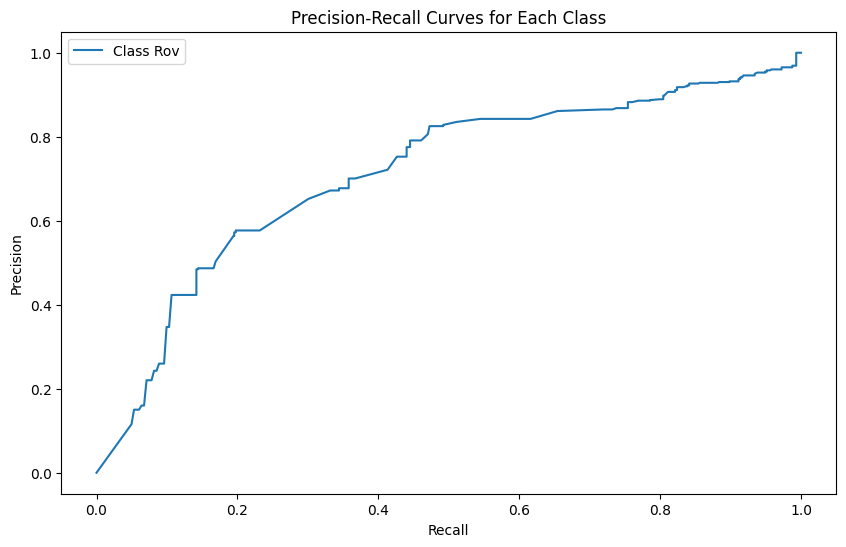

In [ ]:
# Define class names properly
class_names = ['Bio', 'Rov', 'Trash']

# Let's check the structure of the precision-recall curves data
for i, precision_recall_curve in enumerate(precision_recall):
    # Ensure we don't access an out-of-range index in class_names
    if i < len(class_names):
        print(f"Class {class_names[i]} Precision-Recall curve data:")
        print(f"Recall: {precision_recall_curve[0]}")
        print(f"Precision: {precision_recall_curve[1]}")
    else:
        print(f"Index {i} exceeds class_names length. Skipping.")

# Now, let's plot the curves
plt.figure(figsize=(10, 6))
for i, precision_recall_curve in enumerate(precision_recall):
    recall = precision_recall_curve[0]
    precision = precision_recall_curve[1]

    if isinstance(recall, np.ndarray) and isinstance(precision, np.ndarray):
        if i < len(class_names):  # Check if the class name exists for the given index
            plt.plot(recall, precision, label=f'Class {class_names[i]}')
        else:
            print(f"Class index {i} exceeds class_names length, skipping plot.")
    else:
        print(f"Data format issue for class index {i}, skipping plot.")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Each Class')
plt.legend()
plt.show()


Precision-Recall Curves Structure:
Class 0 - Recall: 0.0, Precision: 0.001001001001001001
Class 1 - Recall: [          1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1
           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1
           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1  

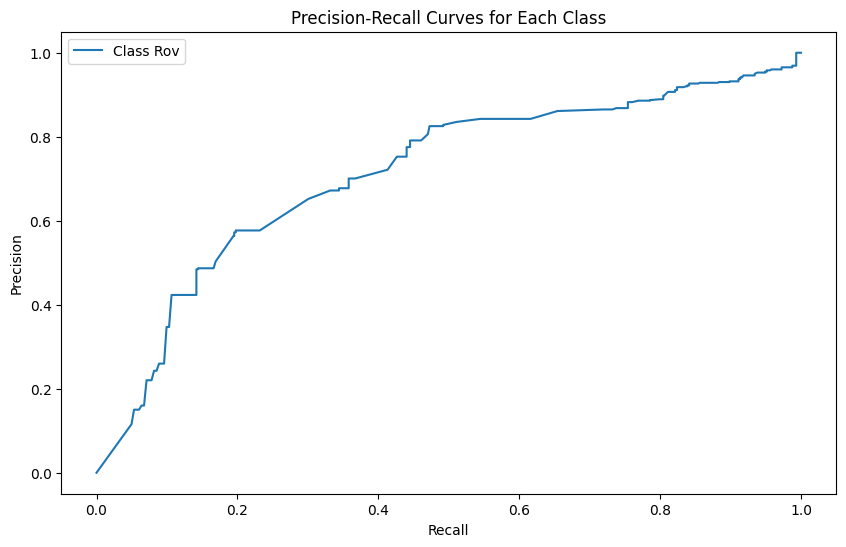

In [ ]:
# Define class names correctly
class_names = ['Bio', 'Rov', 'Trash']

# Check the structure of precision_recall to make sure the data is correct
print("Precision-Recall Curves Structure:")
for i, precision_recall_curve in enumerate(precision_recall):
    print(f"Class {i} - Recall: {precision_recall_curve[0]}, Precision: {precision_recall_curve[1]}")

# Plot the precision-recall curves for all classes
plt.figure(figsize=(10, 6))

for i, precision_recall_curve in enumerate(precision_recall):
    # Ensure that we have data for recall and precision
    recall = precision_recall_curve[0]
    precision = precision_recall_curve[1]

    # Ensure that recall and precision are valid arrays
    if isinstance(recall, np.ndarray) and isinstance(precision, np.ndarray):
        if i < len(class_names):  # Check if the class name exists for the given index
            plt.plot(recall, precision, label=f'Class {class_names[i]}')
        else:
            print(f"Class index {i} exceeds class_names length, skipping plot.")
    else:
        print(f"Data format issue for class index {i}, skipping plot.")

# Customize the plot with labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Each Class')
plt.legend()
plt.show()


Inspecting Precision-Recall data for each class:

Class Bio:
Type of precision_recall_curve: <class 'numpy.ndarray'>
Content of precision_recall_curve: [          0    0.001001    0.002002    0.003003    0.004004    0.005005    0.006006    0.007007    0.008008    0.009009     0.01001    0.011011    0.012012    0.013013    0.014014    0.015015    0.016016    0.017017    0.018018    0.019019     0.02002    0.021021    0.022022    0.023023    0.024024    0.025025
    0.026026    0.027027    0.028028    0.029029     0.03003    0.031031    0.032032    0.033033    0.034034    0.035035    0.036036    0.037037    0.038038    0.039039     0.04004    0.041041    0.042042    0.043043    0.044044    0.045045    0.046046    0.047047    0.048048    0.049049     0.05005    0.051051
    0.052052    0.053053    0.054054    0.055055    0.056056    0.057057    0.058058    0.059059     0.06006    0.061061    0.062062    0.063063    0.064064    0.065065    0.066066    0.067067    0.068068    0.069069     0

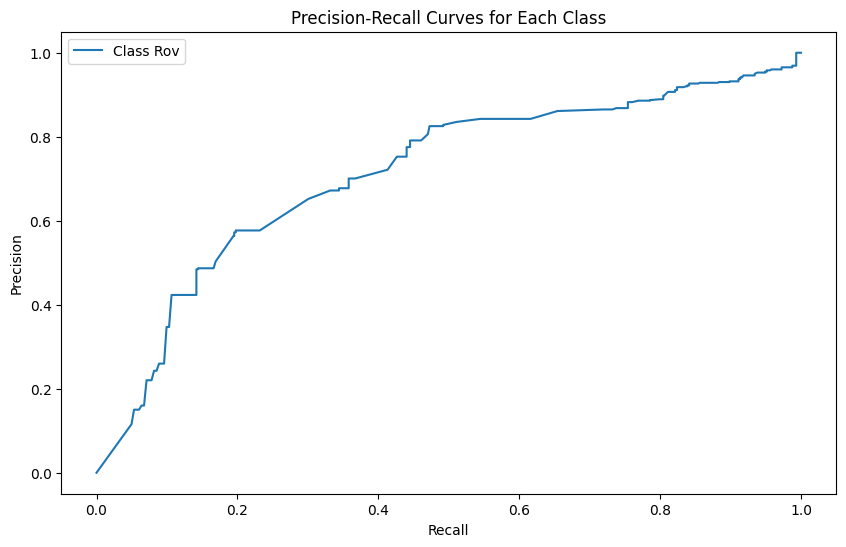

In [ ]:
# Dynamically define the class names based on the number of classes in precision_recall
class_names = ['Bio', 'Rov', 'Trash']  # You may update this list based on the actual number of classes

print("Inspecting Precision-Recall data for each class:")
for i, precision_recall_curve in enumerate(precision_recall):
    if i >= len(class_names):  # Check if the index is within the bounds of class_names
        class_names.append(f"Class_{i}")  # Append a placeholder class name if necessary

    print(f"\nClass {class_names[i]}:")
    print(f"Type of precision_recall_curve: {type(precision_recall_curve)}")
    print(f"Content of precision_recall_curve: {precision_recall_curve}")

    if isinstance(precision_recall_curve, tuple) and len(precision_recall_curve) == 2:
        recall, precision = precision_recall_curve
        print(f"Recall (length {len(recall)}): {recall}")
        print(f"Precision (length {len(precision)}): {precision}")

    elif isinstance(precision_recall_curve, np.ndarray) and precision_recall_curve.ndim == 2:
        recall = precision_recall_curve[0]  # Assuming first row is recall
        precision = precision_recall_curve[1]  # Assuming second row is precision
        print(f"Recall (length {len(recall)}): {recall}")
        print(f"Precision (length {len(precision)}): {precision}")

    elif isinstance(precision_recall_curve, str) and precision_recall_curve.lower() == "recall":
        print(f"Warning: Only recall data available for class {class_names[i]}.")

    else:
        print(f"Warning: Invalid data structure for class {class_names[i]}.")

# After debugging, proceed to plot
plt.figure(figsize=(10, 6))

# Plot the precision-recall curves for each class
for i, precision_recall_curve in enumerate(precision_recall):
    if isinstance(precision_recall_curve, tuple) and len(precision_recall_curve) == 2:
        recall = precision_recall_curve[0]
        precision = precision_recall_curve[1]

        # Check if the recall and precision arrays have valid data
        if isinstance(recall, np.ndarray) and isinstance(precision, np.ndarray) and len(recall) > 0 and len(precision) > 0:
            plt.plot(recall, precision, label=f'Class {class_names[i]}')
        else:
            print(f"Skipping class {class_names[i]} due to invalid or missing data.")

    elif isinstance(precision_recall_curve, np.ndarray) and precision_recall_curve.ndim == 2:
        recall = precision_recall_curve[0]  # First row (Recall)
        precision = precision_recall_curve[1]  # Second row (Precision)
        if len(recall) > 0 and len(precision) > 0:
            plt.plot(recall, precision, label=f'Class {class_names[i]}')
        else:
            print(f"Skipping class {class_names[i]} due to invalid or missing data.")

    elif isinstance(precision_recall_curve, str) and precision_recall_curve.lower() == "recall":
        print(f"Skipping class {class_names[i]} due to missing precision data.")

    else:
        print(f"Skipping class {class_names[i]} due to invalid data structure.")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Each Class')
plt.legend()
plt.show()


Skipping class Bio due to invalid data structure.


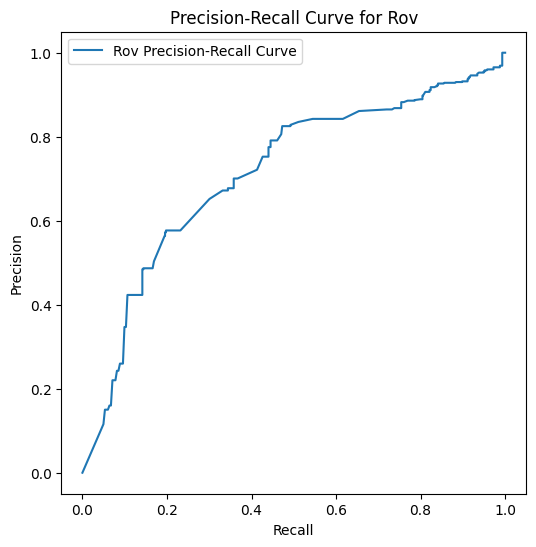

Skipping class Trash due to invalid data structure.
Skipping class Class_3 due to invalid data structure.


In [ ]:
# Check the structure of precision_recall
for i, precision_recall_curve in enumerate(precision_recall):
    class_name = class_names[i] if i < len(class_names) else f"Class_{i}"

    if isinstance(precision_recall_curve, tuple) and len(precision_recall_curve) == 2:
        recall, precision = precision_recall_curve
    elif isinstance(precision_recall_curve, np.ndarray) and precision_recall_curve.ndim == 2:
        recall = precision_recall_curve[0]  # Assuming first row is recall
        precision = precision_recall_curve[1]  # Assuming second row is precision
    else:
        print(f"Skipping class {class_name} due to invalid data structure.")
        continue

    # Create a plot for each class
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, label=f'{class_name} Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {class_name}')
    plt.legend()
    plt.show()


In [ ]:
# Print the results object to inspect its structure
print(results)


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c962b6c08d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
import os

for root, dirs, files in os.walk("/content"):
    if "data.yaml" in files:
        print(os.path.join(root, "data.yaml"))


In [ ]:
model.val()


Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /root/.cache/kagglehub/datasets/karanwxlia/underwater-trash-detection/versions/1/utd2.v8i.yolov8/valid/labels.cache... 957 images, 0 backgrounds, 0 corrupt: 100%|██████████| 957/957 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:19<00:00,  3.12it/s]


                   all        957       1432      0.895      0.857       0.92      0.702
                   Bio        198        269      0.877      0.822      0.894      0.694
                   Rov        156        201      0.881      0.919      0.947      0.778
                 Trash        769        962      0.927      0.831       0.92      0.635
Speed: 1.7ms preprocess, 4.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c981e6c7690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
import os

# List all files in the current directory to locate the model file
model_files = [f for f in os.listdir() if f.endswith('.pt')]
print(model_files)


['yolov8n.pt', 'yolo11n.pt']


In [ ]:
import os

# List the files in the current directory
print("Files in current directory:")
for root, dirs, files in os.walk('/content'):
    print(f"Root: {root}")
    print("Files:", files)

# Optionally, list files in a specific folder (if you know where you uploaded the test images)
test_images_folder = '/content/test_images'  # Replace this if you uploaded to a different folder

# Check if the test_images folder exists and list the files
if os.path.exists(test_images_folder):
    image_files = [f for f in os.listdir(test_images_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
    print(f"Images in the test folder {test_images_folder}: {image_files}")
else:
    print(f"The folder {test_images_folder} does not exist.")


Files in current directory:
Root: /content
Files: ['yolov8n.pt', 'yolo11n.pt']
Root: /content/.config
Files: ['active_config', 'gce', 'hidden_gcloud_config_universe_descriptor_data_cache_configs.db', 'default_configs.db', '.last_update_check.json', '.last_opt_in_prompt.yaml', '.last_survey_prompt.yaml', 'config_sentinel']
Root: /content/.config/logs
Files: []
Root: /content/.config/logs/2025.03.20
Files: ['13.31.01.332468.log', '13.30.51.447492.log', '13.31.10.331550.log', '13.30.59.830488.log', '13.30.26.993509.log', '13.31.09.706011.log']
Root: /content/.config/configurations
Files: ['config_default']
Root: /content/YOLOv8
Files: ['data.yaml']
Root: /content/YOLOv8/valid
Files: []
Root: /content/YOLOv8/valid/images
Files: []
Root: /content/YOLOv8/utd2.v8i.coco
Files: ['README.roboflow.txt', 'README.dataset.txt']
Root: /content/YOLOv8/utd2.v8i.coco/valid
Files: ['vid_000084_frame0000041_jpg.rf.886977244a7611f4e394b09646d3c69d.jpg', 'bio0000_frame0000093_jpg.rf.fad6d5ced3e35d28b2adc357

In [ ]:
test_image_path = '/content/YOLOv8/utd2.v8i.coco/test/bio0002_frame0000130_jpg.rf.0c5b444499749b309677f68fe08ddbc8.jpg'

# Load the image into the model
image = cv2.imread(test_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
model.predict(source=test_image_path)  # Use the correct image path



image 1/1 /content/YOLOv8/utd2.v8i.coco/test/bio0002_frame0000130_jpg.rf.0c5b444499749b309677f68fe08ddbc8.jpg: 640x640 1 Bio, 10.4ms
Speed: 3.4ms preprocess, 10.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Bio', 1: 'Rov', 2: 'Trash'}
 obb: None
 orig_img: array([[[116, 127, 107],
         [116, 127, 107],
         [115, 126, 106],
         ...,
         [ 92, 103,  87],
         [ 90, 101,  85],
         [ 89, 100,  84]],
 
        [[107, 118,  98],
         [107, 118,  98],
         [107, 118,  98],
         ...,
         [ 87,  98,  82],
         [ 86,  97,  81],
         [ 85,  96,  80]],
 
        [[ 99, 110,  90],
         [100, 111,  91],
         [101, 112,  92],
         ...,
         [ 81,  94,  78],
         [ 80,  93,  77],
         [ 80,  93,  77]],
 
        ...,
 
        [[ 19,  41,  29],
         [ 11,  33,  21],
         [  0,  22,  10],
         ...,
         [179, 185, 180],
         [ 92,  98,  93],
         [111, 117, 112]],
 
        [[  0,  24,  12],
         [  0,  23,  11],
         [  5,  27,  15],
         ...,

In [ ]:
# Run inference on the test image and save the result
results = model('/content/YOLOv8/utd2.v8i.coco/test/bio0002_frame0000130_jpg.rf.0c5b444499749b309677f68fe08ddbc8.jpg', save=True)

# Check if the directory was created and list files in it
output_dir = '/content/YOLOv8/runs/detect/predict'
os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists
files = os.listdir(output_dir)
print(files)



image 1/1 /content/YOLOv8/utd2.v8i.coco/test/bio0002_frame0000130_jpg.rf.0c5b444499749b309677f68fe08ddbc8.jpg: 640x640 1 Bio, 23.1ms
Speed: 6.9ms preprocess, 23.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
[]


In [ ]:
results = model('/content/YOLOv8/utd2.v8i.coco/test/bio0002_frame0000130_jpg.rf.0c5b444499749b309677f68fe08ddbc8.jpg', conf=0.3)



image 1/1 /content/YOLOv8/utd2.v8i.coco/test/bio0002_frame0000130_jpg.rf.0c5b444499749b309677f68fe08ddbc8.jpg: 640x640 1 Bio, 10.9ms
Speed: 4.5ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



image 1/1 /content/YOLOv8/utd2.v8i.coco/test/bio0002_frame0000130_jpg.rf.0c5b444499749b309677f68fe08ddbc8.jpg: 640x640 1 Bio, 11.8ms
Speed: 4.7ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


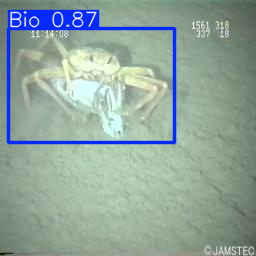

In [ ]:
results = model('/content/YOLOv8/utd2.v8i.coco/test/bio0002_frame0000130_jpg.rf.0c5b444499749b309677f68fe08ddbc8.jpg', conf=0.3)

# If results are in a list, access the first element
first_result = results[0]

# Now, use the show() method on the first result
first_result.show()


In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.0/950.0 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
test_image_path = '/content/YOLOv8/utd2.v8i.coco/test/obj0347_frame0000084_jpg.rf.01833a23f300106a5a0881cf902c97eb.jpg'

# Load the image into the model
image = cv2.imread(test_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
model.predict(source=test_image_path)  # Use the correct image path



image 1/1 /content/YOLOv8/utd2.v8i.coco/test/obj0347_frame0000084_jpg.rf.01833a23f300106a5a0881cf902c97eb.jpg: 640x640 (no detections), 22.1ms
Speed: 4.6ms preprocess, 22.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p